In [1]:
import pandas as pd
from tqdm import tqdm

# pre_experiment = pd.read_csv('d?ata/experiments/experiments_mode.csv')
pre_experiment = None

columns = ['model_name', 'desire', 'num_sample', 'loss',
           'age_group_error', 'income_group_error', 'household_size_error', 'vehicles_error', 'family_structure_error', 'mean_error',
           'age_group_kl', 'income_group_kl', 'household_size_kl',
           'vehicles_kl', 'family_structure_kl', 'mean_kl',
           'best_params']

In [2]:
desire = 'Eat'
choice_type = 'mode'
seed = 42

In [3]:
def run_baseline_mode(model_name, model_class):
    df = pd.DataFrame(columns=columns)
    for num_sample in tqdm(range(1, 11)):
        num_sample = num_sample * 100
        model = model_class(data_dir='baseline/data',
                            desire=desire, sample_num=num_sample, seed=seed)
        if pre_experiment is not None:
            best_params = pre_experiment[(pre_experiment.model_name == model_name) & (
                pre_experiment.desire == desire) & (pre_experiment.num_sample == num_sample)].best_params.values[0]
            best_params = eval(best_params)
        else:
            best_params = None
        loss, error, kl_divergence = model.run_experiment(best_params)
        results = {
            "model_name": model_name,
            "desire": desire,
            "num_sample": num_sample,
            "loss": loss,
        }
        for key in ['age_group', 'income_group', 'household_size', 'vehicles', 'family_structure', 'mean']:
            results[key + '_error'] = error[key]
            results[key + '_kl'] = kl_divergence[key]
        results['best_params'] = model.best_params
        df.loc[len(df)] = results
    return df

In [4]:
def run_proposed_model(model_name, model_class):
    df = pd.DataFrame(columns=columns)
    for num_sample in range(1, 11):
        num_sample = num_sample * 100
        choice_model = model_class(
            data_dir='data', desire=desire, sample_num=num_sample, skip_init=True, seed=seed)
        loss, error, kl_divergence = choice_model.evaluate(
            figsize=(20, 3), plot=False)
        results = {
            "model_name": model_name,
            "desire": desire,
            "num_sample": num_sample,
            "loss": loss,
        }
        for key in ['age_group', 'income_group', 'household_size', 'vehicles', 'family_structure', 'mean']:
            results[key + '_error'] = error[key]
            results[key + '_kl'] = kl_divergence[key]
        df.loc[len(df)] = results
    return df

# RandomForest


In [5]:
from baseline.models.random_forest import RandomForest

model_name = 'randomforest'

rf_df = run_baseline_mode(model_name, RandomForest)
rf_df.head()

100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


,model_name,desire,num_sample,loss,age_group_error,income_group_error,household_size_error,vehicles_error,family_structure_error,mean_error,age_group_kl,income_group_kl,household_size_kl,vehicles_kl,family_structure_kl,mean_kl,best_params
0,randomforest,Eat,100,1.046770,0.167126,0.092353,0.133306,0.130968,0.118151,0.128381,0.427084,0.077951,0.145585,0.529814,0.113051,0.258697,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
1,randomforest,Eat,200,1.046380,0.151896,0.124325,0.134216,0.122748,0.104326,0.127502,1.578581,0.120465,0.117465,0.600010,0.090600,0.501424,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
2,randomforest,Eat,300,1.042845,0.132831,0.103919,0.155946,0.120536,0.138334,0.130313,1.480226,0.087797,0.297977,1.198195,0.136761,0.640191,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
3,randomforest,Eat,400,1.038204,0.120383,0.079735,0.136251,0.116019,0.142780,0.119034,0.245984,0.054004,0.902056,2.207791,0.131067,0.708180,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
4,randomforest,Eat,500,1.032735,0.114237,0.100157,0.134015,0.125898,0.101830,0.115227,0.747067,0.084597,0.305721,2.200179,0.063153,0.680143,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."


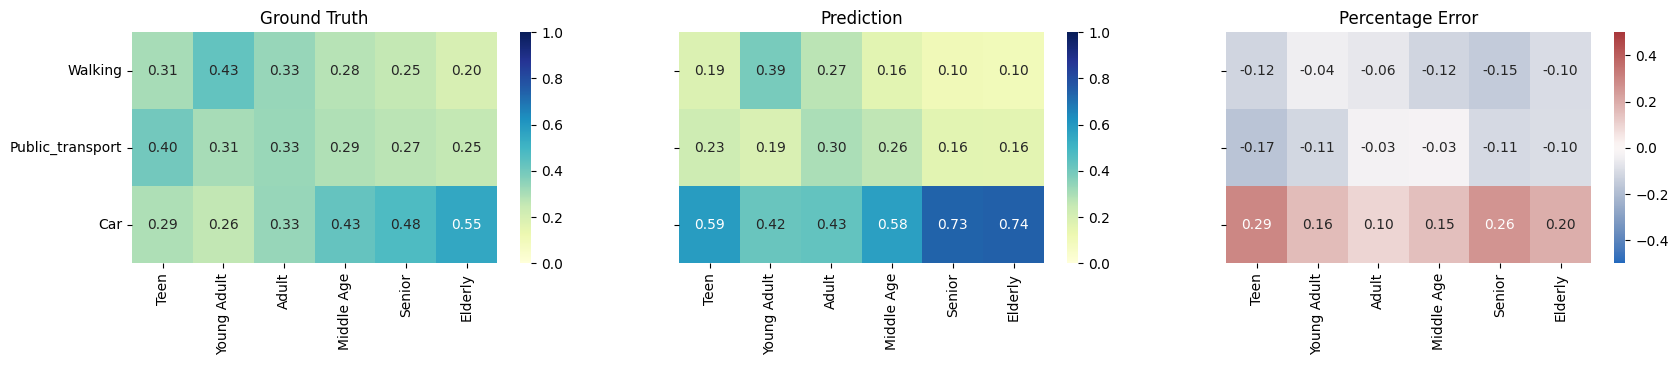

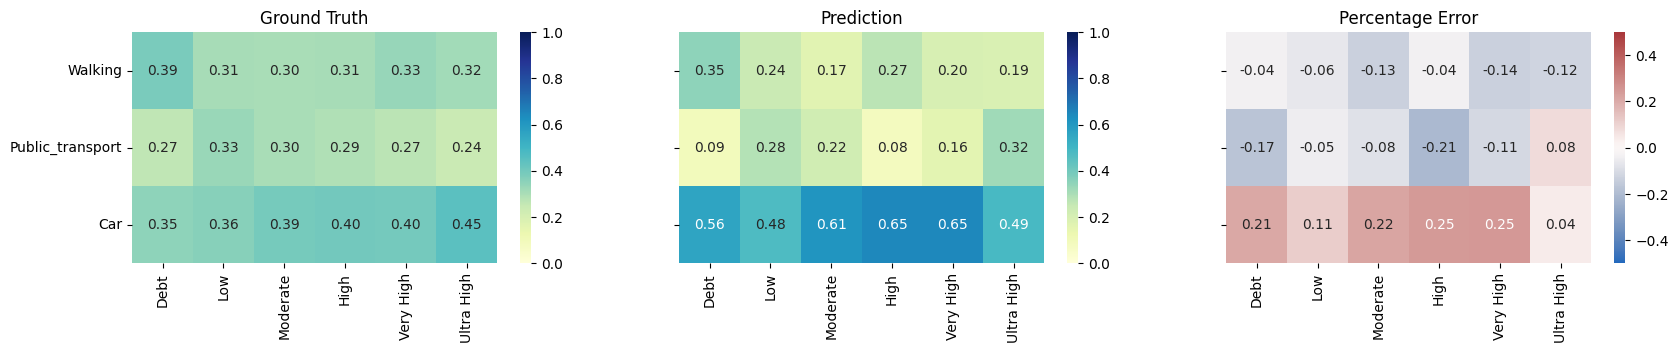

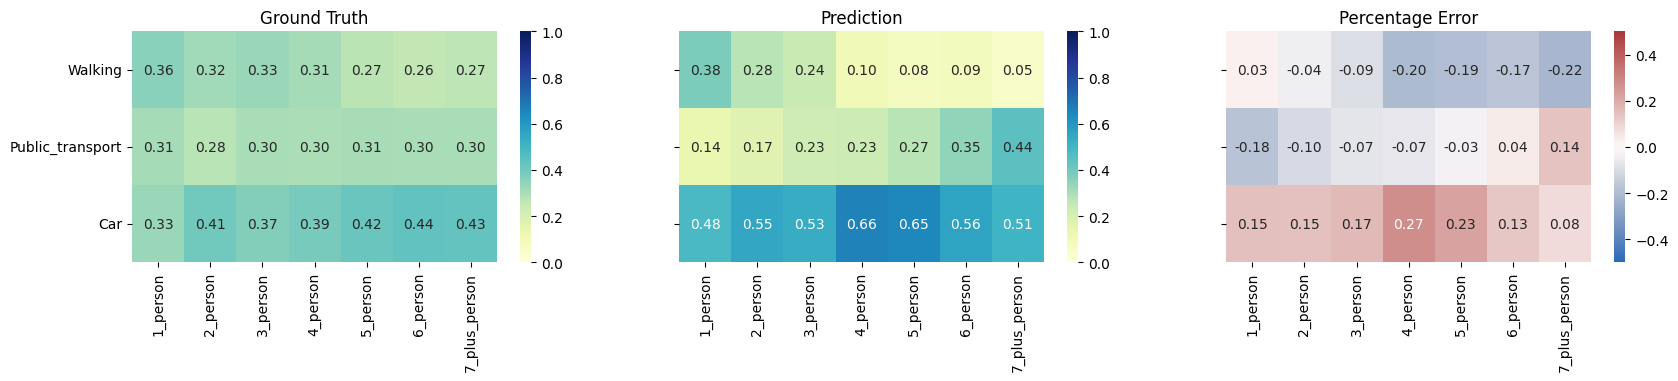

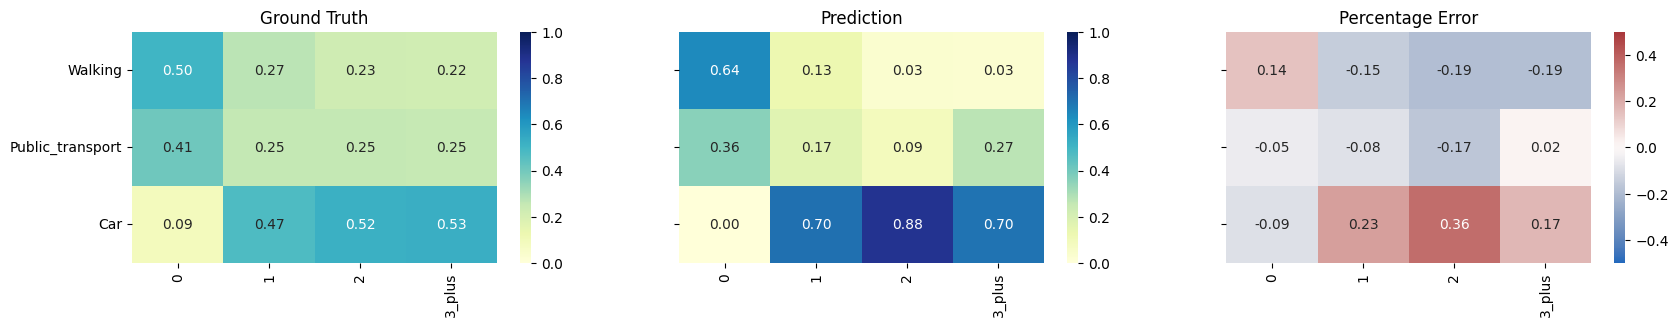

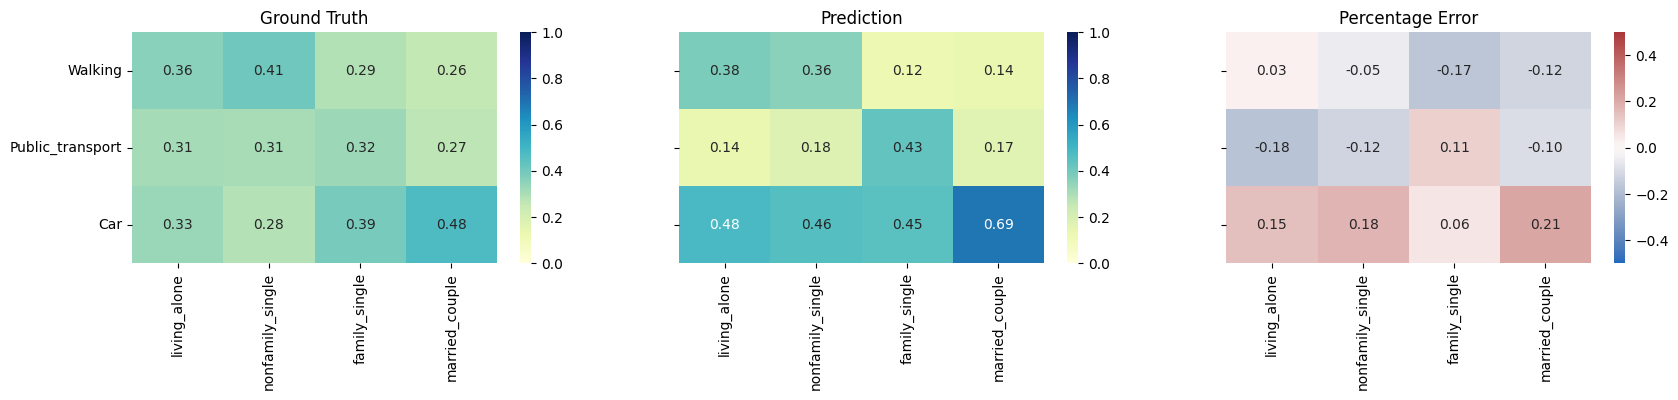

CCE LOSS: 1.0261361538241787
MAPE: 0.1327176785522135
KL Divergence: 0.21355836128457545


In [6]:
from baseline.models.random_forest import RandomForest

num_sample = 1000

model = RandomForest(data_dir='baseline/data',
                     desire=desire, sample_num=num_sample, seed=seed)
model.load_dataset()
model.prepare_data()
model.optimize()
model.train()
loss, error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

# XGBoost


In [7]:
from baseline.models.xgboost import XGBoost


model_name = 'xgboost'

xgb_df = run_baseline_mode(model_name, XGBoost)
xgb_df.head()

100%|██████████| 10/10 [00:44<00:00,  4.49s/it]


,model_name,desire,num_sample,loss,age_group_error,income_group_error,household_size_error,vehicles_error,family_structure_error,mean_error,age_group_kl,income_group_kl,household_size_kl,vehicles_kl,family_structure_kl,mean_kl,best_params
0,xgboost,Eat,100,1.087997,0.153619,0.080105,0.132421,0.162279,0.072793,0.120244,0.418379,0.066770,0.275238,0.870592,0.044118,0.335020,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."
1,xgboost,Eat,200,1.086883,0.132619,0.115065,0.141081,0.162150,0.131793,0.136542,0.778293,0.089894,0.178555,0.311756,0.129448,0.297589,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."
2,xgboost,Eat,300,1.087681,0.134984,0.114309,0.164543,0.119569,0.139198,0.134521,0.184278,0.085952,0.236130,1.172201,0.112654,0.358243,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."
3,xgboost,Eat,400,1.086095,0.125225,0.094714,0.139187,0.119033,0.153060,0.126244,0.137661,0.068659,0.241941,1.371016,0.146865,0.393228,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."
4,xgboost,Eat,500,1.085006,0.110136,0.112562,0.136541,0.130369,0.102998,0.118521,0.107477,0.093096,0.227883,2.192930,0.091297,0.542537,"{'gamma': 0.2, 'learning_rate': 0.001, 'max_de..."


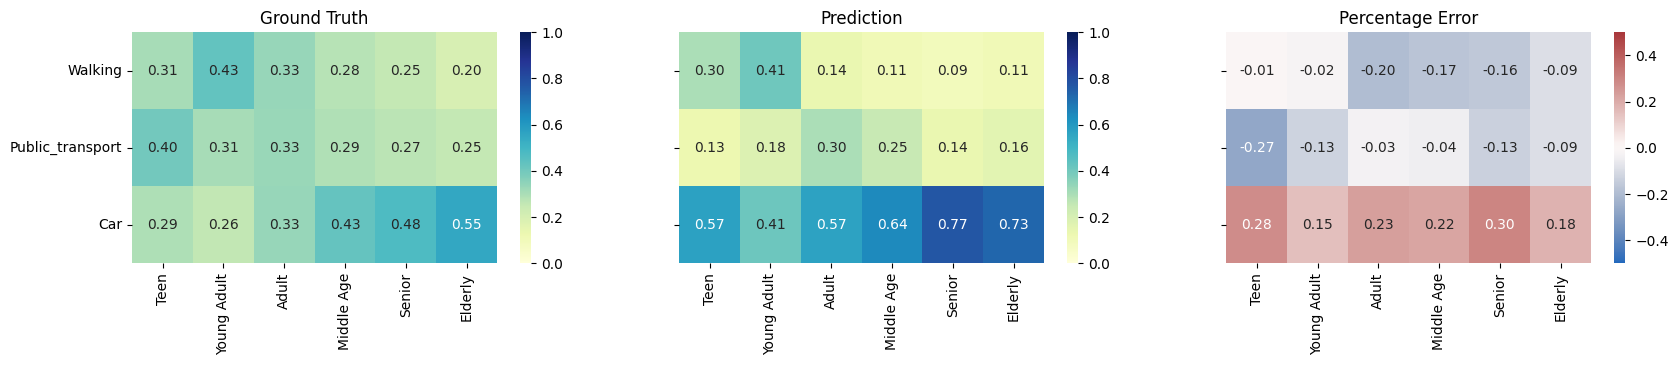

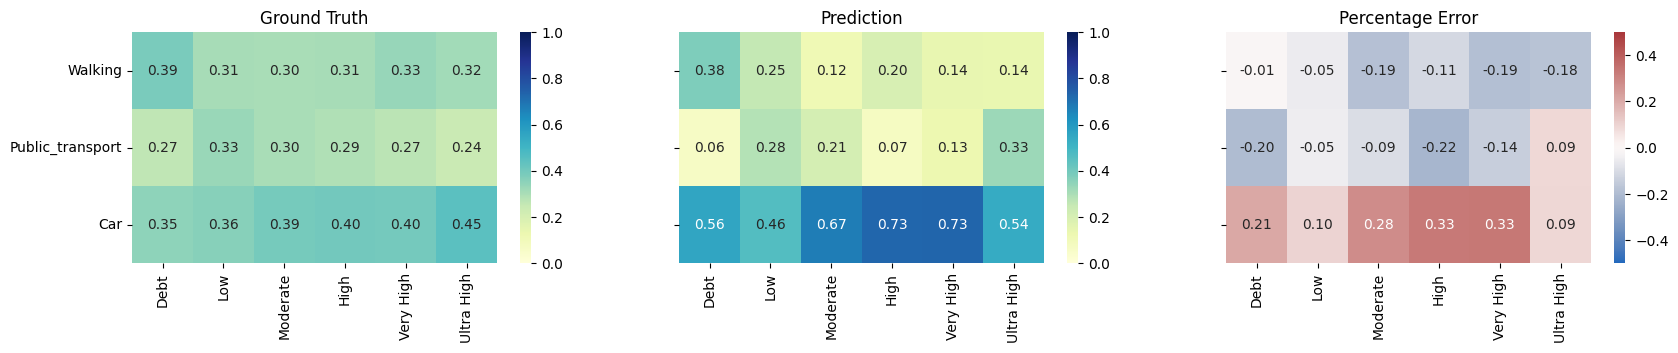

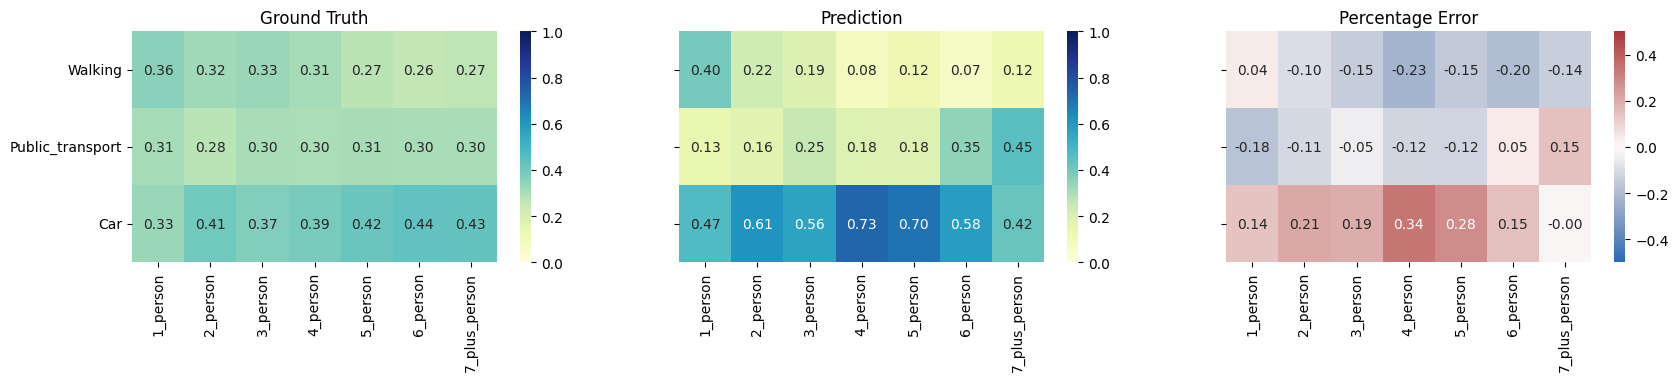

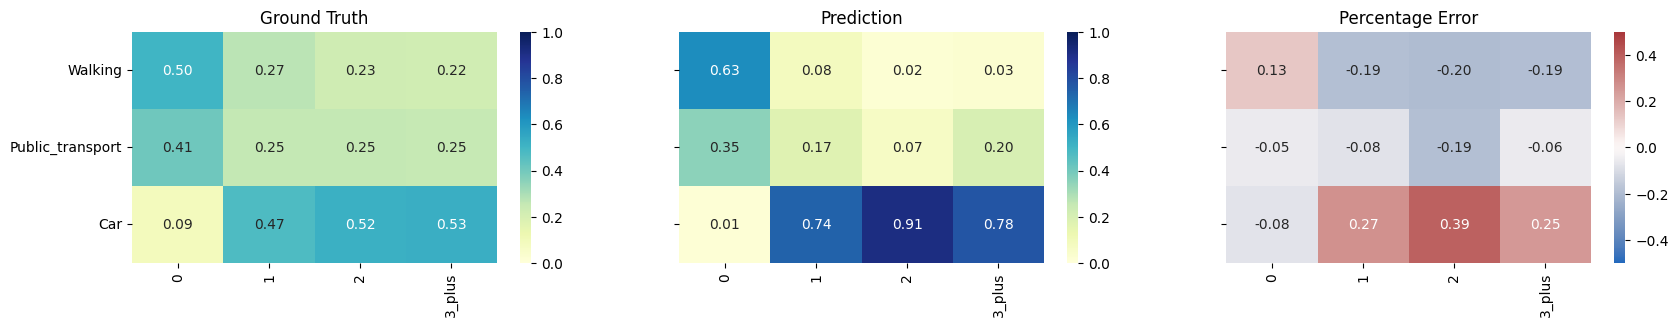

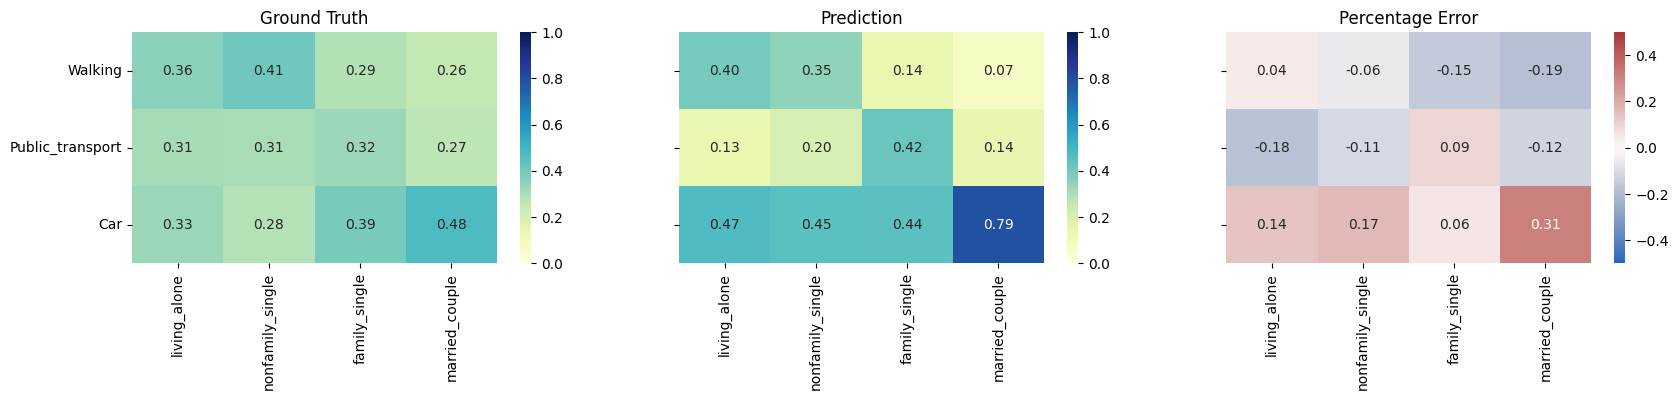

CCE LOSS: 1.0849659656981583
MAPE: 0.15307594120109375
KL Divergence: 0.1834111750045219


In [8]:
from baseline.models.xgboost import XGBoost

num_sample = 1000

model = XGBoost(data_dir='baseline/data',
                desire=desire, sample_num=num_sample, seed=seed)
model.load_dataset()
model.prepare_data()
model.optimize()
model.train()
loss, error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

# Multilayer Perceptron


In [9]:
from baseline.models.multilayer_perceptron import MLP

model_name = 'multilayer_perceptron'

mlp_df = run_baseline_mode(model_name, MLP)
mlp_df.head()

  0%|          | 0/10 [00:00<?, ?it/s]/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimi

,model_name,desire,num_sample,loss,age_group_error,income_group_error,household_size_error,vehicles_error,family_structure_error,mean_error,age_group_kl,income_group_kl,household_size_kl,vehicles_kl,family_structure_kl,mean_kl,best_params
0,multilayer_perceptron,Eat,100,1.077341,0.154224,0.087954,0.202139,0.116914,0.081592,0.128564,0.304572,0.053938,0.378456,1.183466,0.059124,0.395911,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
1,multilayer_perceptron,Eat,200,1.039812,0.174589,0.084204,0.189427,0.153147,0.137147,0.147703,0.854393,0.052256,1.043084,2.257740,0.117131,0.864921,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
2,multilayer_perceptron,Eat,300,1.041345,0.150408,0.072810,0.219800,0.146204,0.126156,0.143075,0.177042,0.029693,1.798105,2.210655,0.170750,0.877249,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
3,multilayer_perceptron,Eat,400,1.037561,0.166078,0.099590,0.156867,0.138237,0.132963,0.138747,0.222566,0.063325,0.322637,2.184279,0.129440,0.584450,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
4,multilayer_perceptron,Eat,500,1.027770,0.159386,0.114834,0.164011,0.191312,0.120397,0.149988,0.200678,0.090024,0.961394,2.286391,0.129536,0.733605,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."


/Users/kai/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


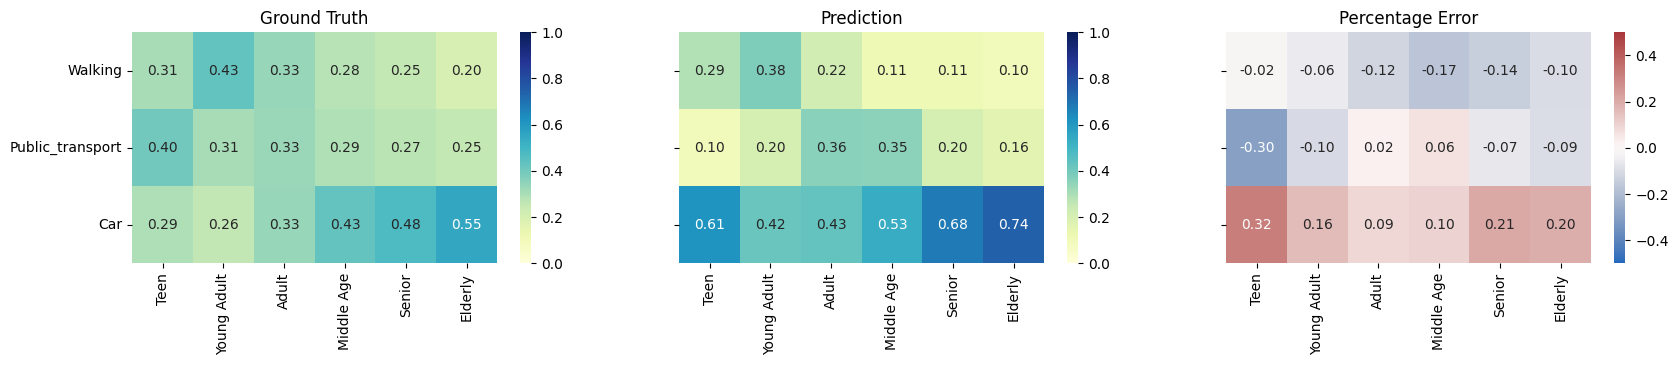

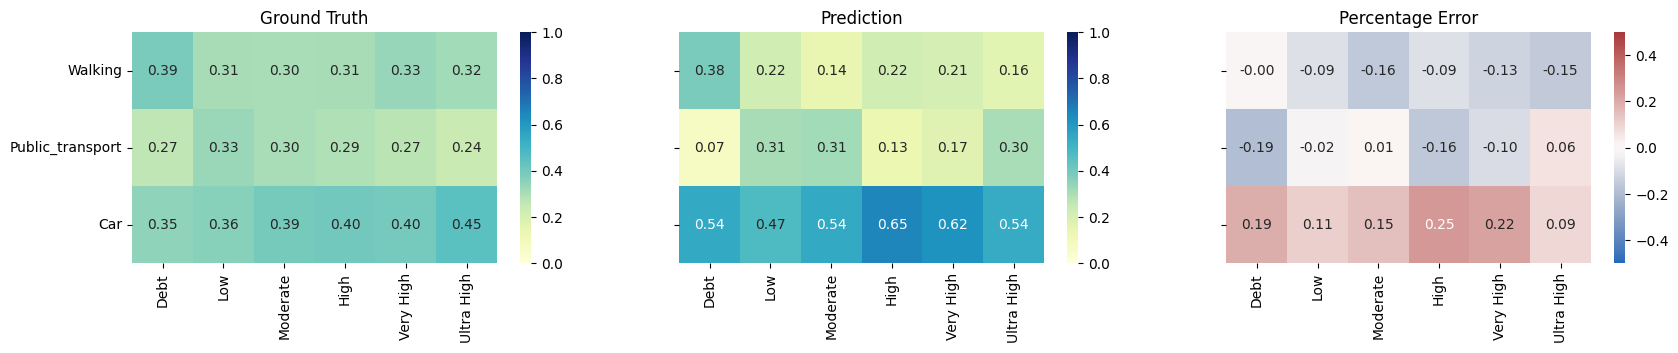

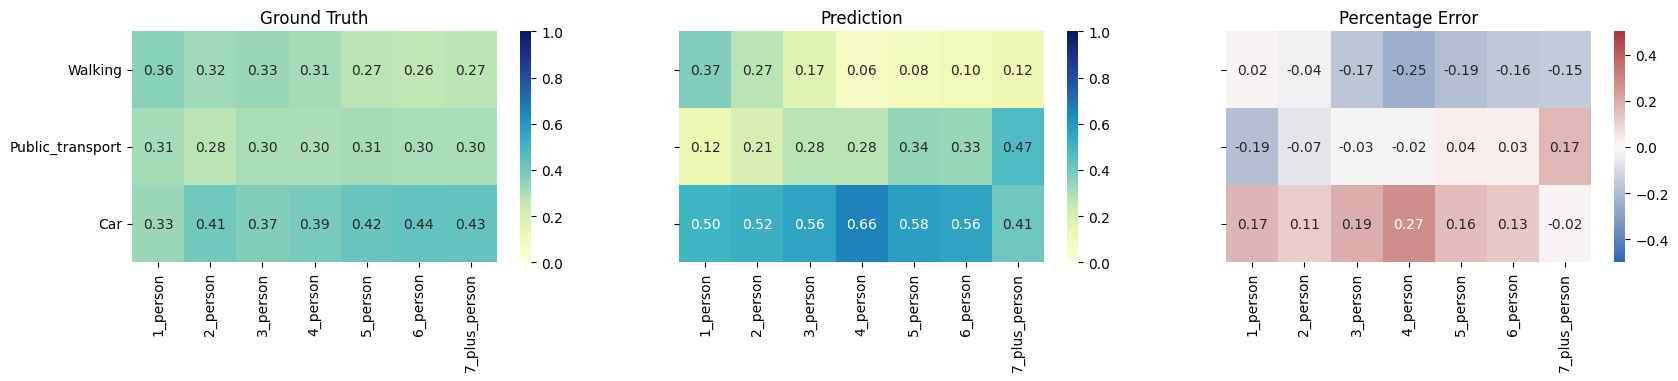

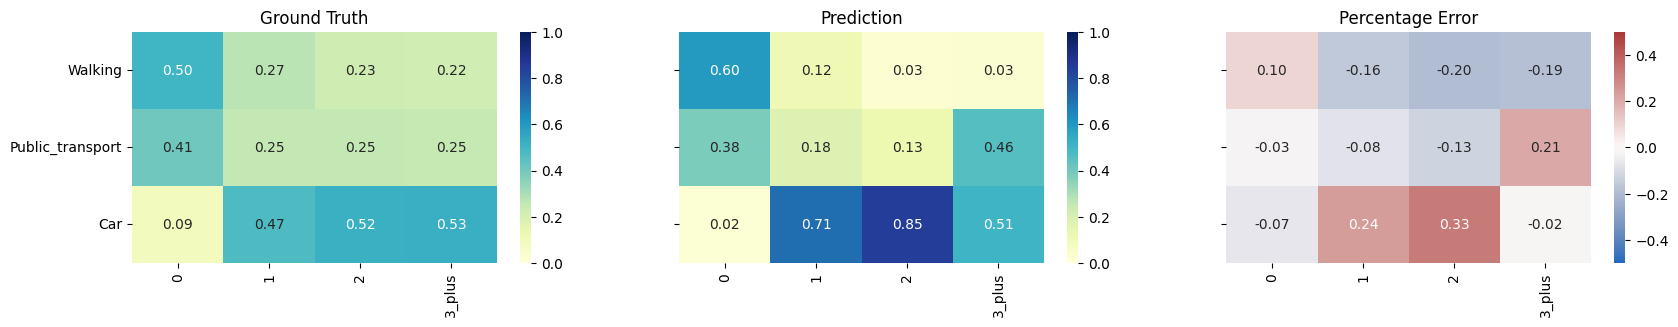

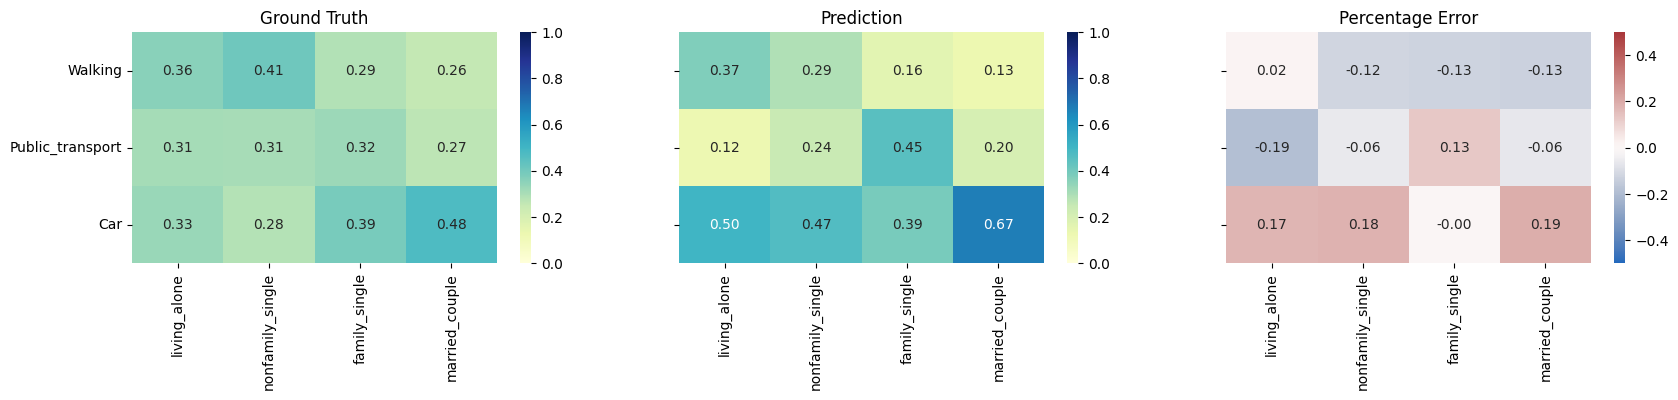

CCE LOSS: 1.0573632690137744
MAPE: 0.1264853483529715
KL Divergence: 0.13569123330410912


In [10]:
from baseline.models.multilayer_perceptron import MLP

num_sample = 1000

model = MLP(data_dir='baseline/data',
            desire=desire, sample_num=num_sample, seed=seed)
model.load_dataset()
model.prepare_data()
# model.optimize()
model.train()
loss, error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

# LLM


In [11]:
from model import ChoiceModel

model_name = 'proposed_method'

proposed_df = run_proposed_model(model_name, ChoiceModel)
proposed_df.head()

,model_name,desire,num_sample,loss,age_group_error,income_group_error,household_size_error,vehicles_error,family_structure_error,mean_error,age_group_kl,income_group_kl,household_size_kl,vehicles_kl,family_structure_kl,mean_kl,best_params
0,proposed_method,Eat,100,1.223990,0.186116,0.070887,0.069825,0.053247,0.064181,0.088851,3.591239,0.037869,0.039725,0.021603,0.023491,0.742785,NaN
1,proposed_method,Eat,200,1.159135,0.171880,0.070643,0.081877,0.073262,0.070270,0.093586,3.566189,0.036269,0.051860,0.031462,0.052303,0.747617,NaN
2,proposed_method,Eat,300,1.173812,0.070843,0.085646,0.089144,0.074105,0.078034,0.079554,0.039925,0.041670,0.057374,0.030510,0.036721,0.041240,NaN
3,proposed_method,Eat,400,1.456413,0.098252,0.070469,0.095933,0.062016,0.064331,0.078200,0.077156,0.037542,0.084558,0.028299,0.024823,0.050476,NaN
4,proposed_method,Eat,500,1.353804,0.115097,0.083491,0.072317,0.090168,0.072960,0.086807,1.877769,0.043724,0.030816,0.051845,0.030788,0.406988,NaN


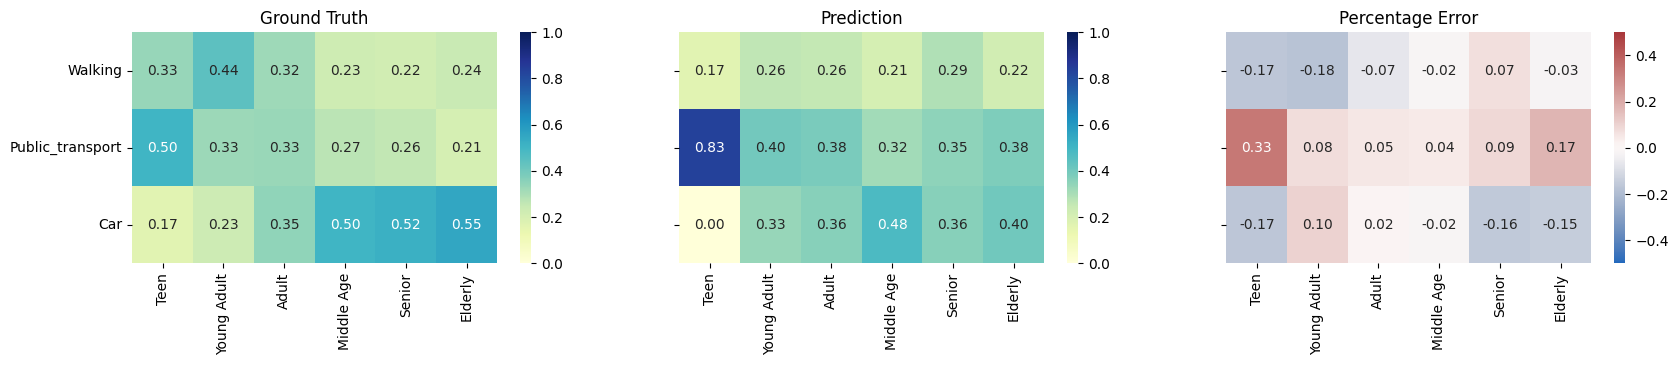

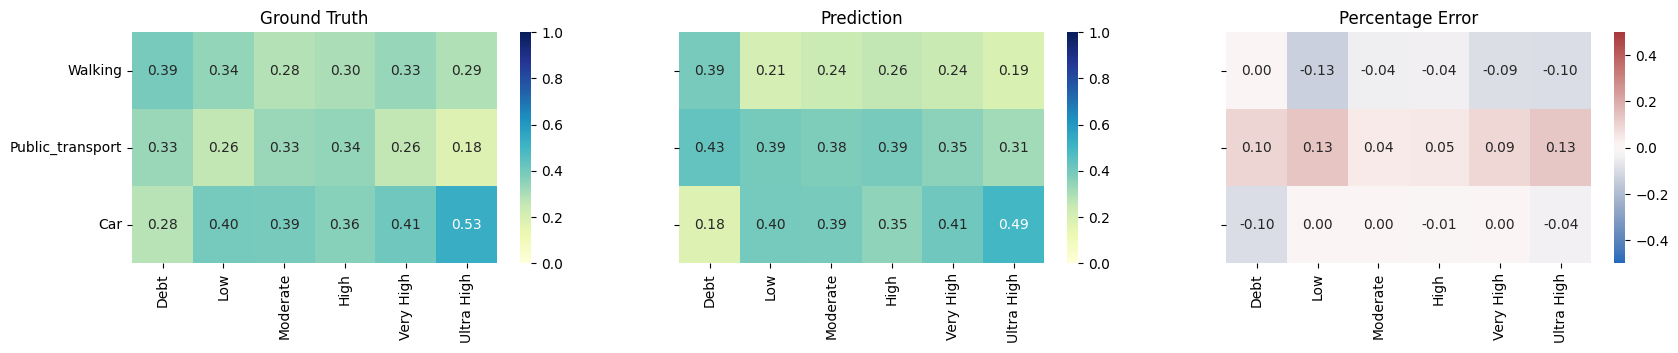

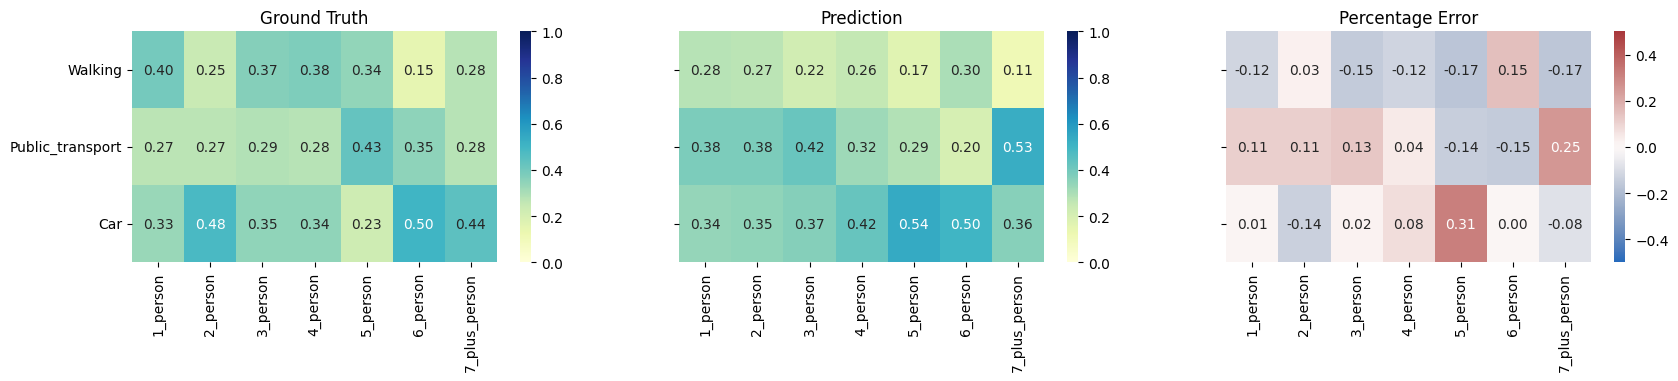

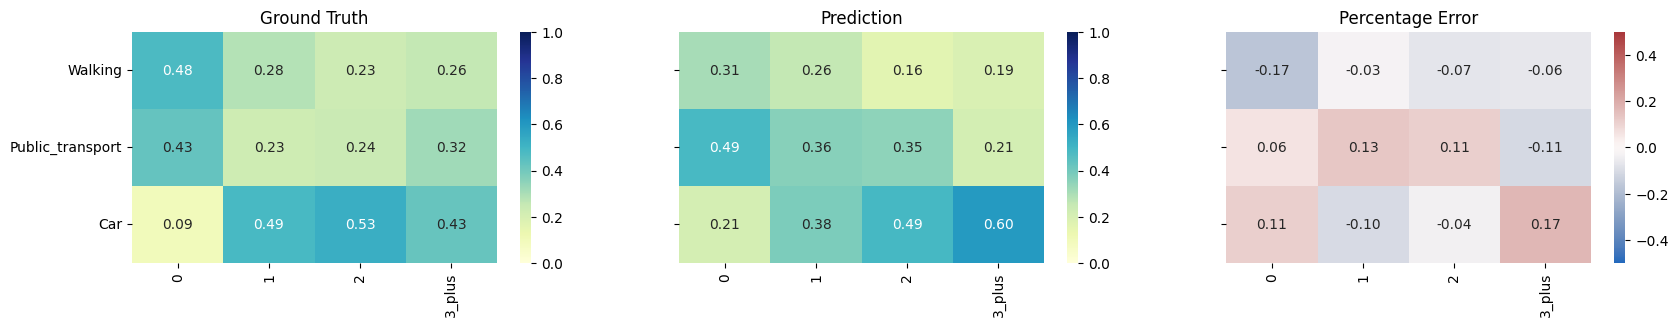

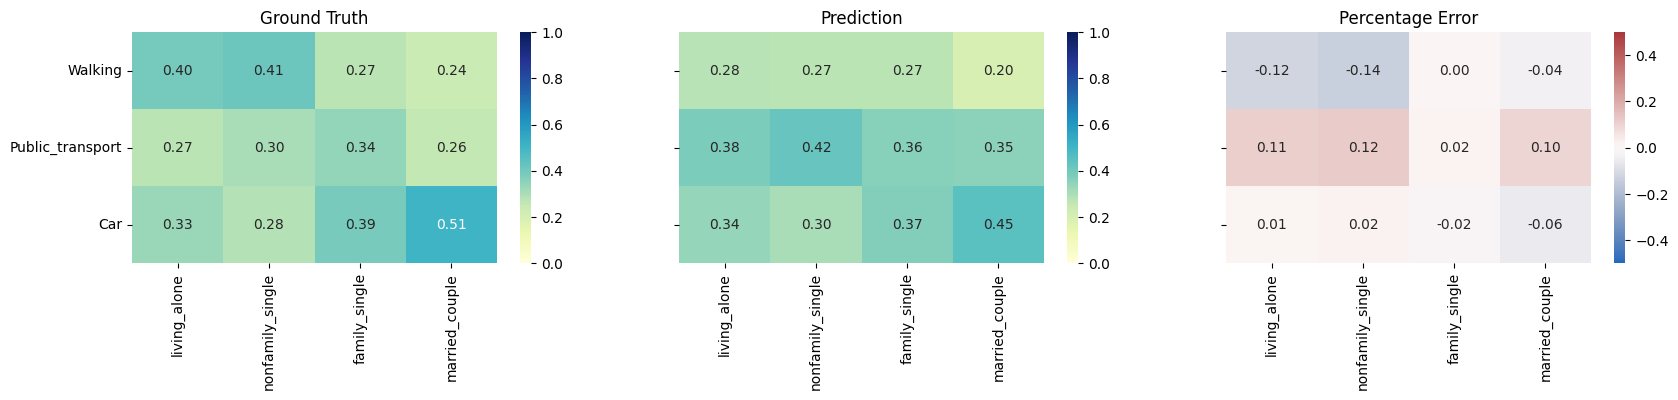

CCE LOSS: 1.2066413263725602
MAPE: 0.08898385247596938
KL Divergence: 0.15642294249934408


In [12]:
from model import ChoiceModel

model_name = 'proposed_method'
num_sample = 0

choice_model = ChoiceModel(
    data_dir='data', desire=desire, sample_num=num_sample, skip_init=True, seed=seed)

loss, error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

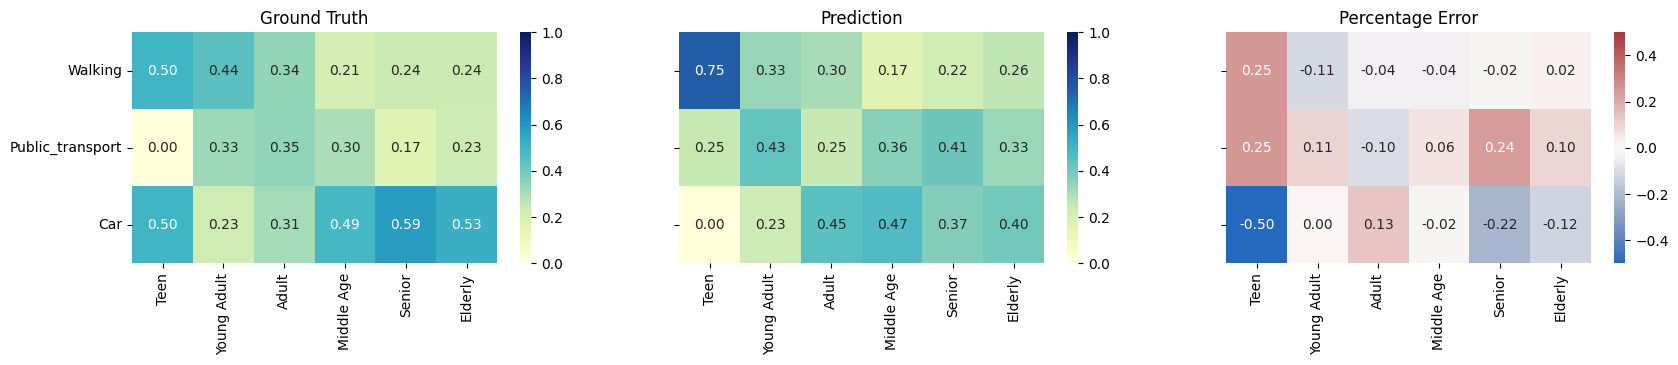

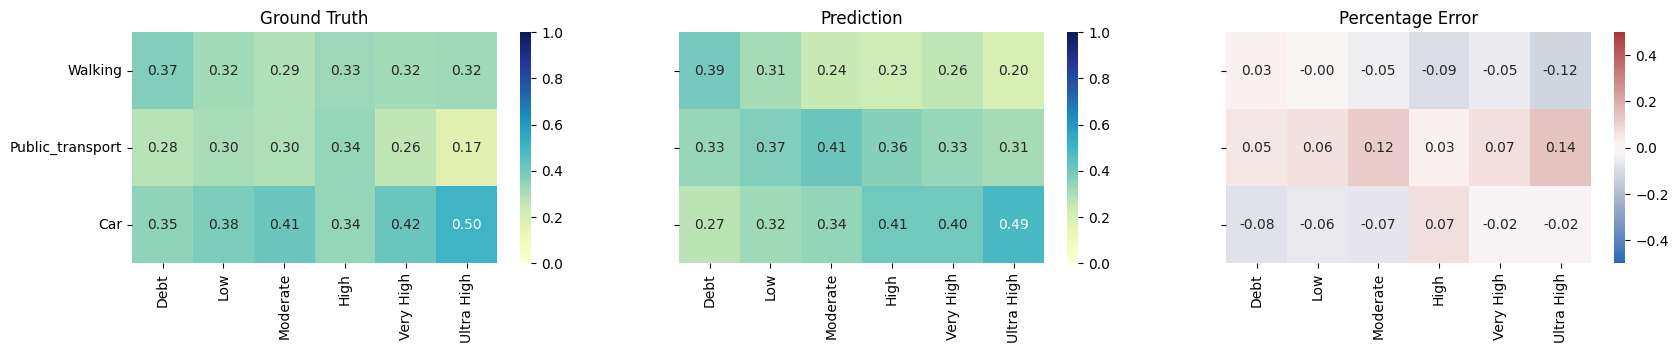

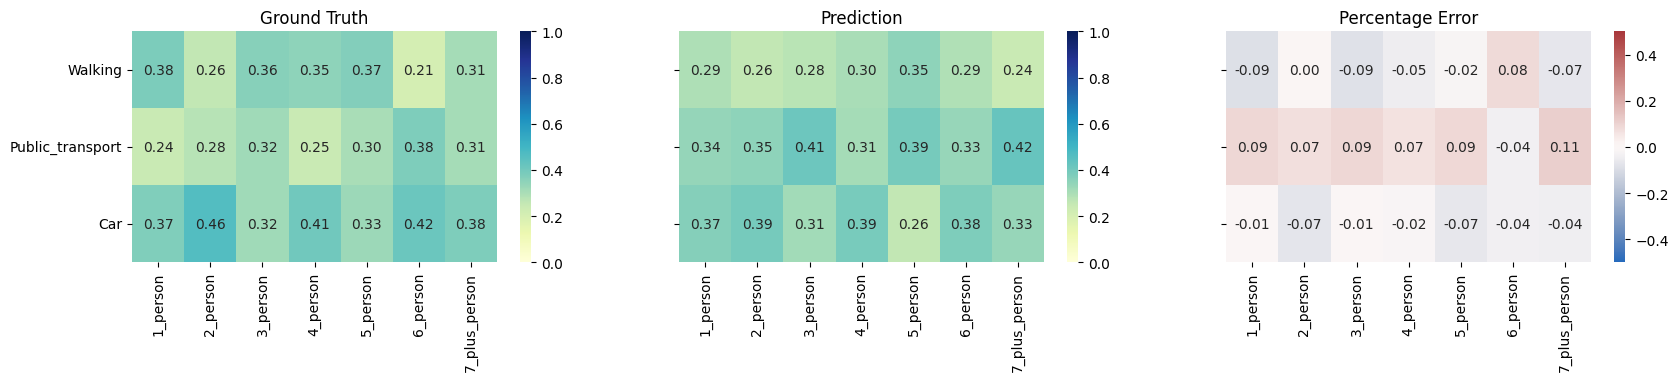

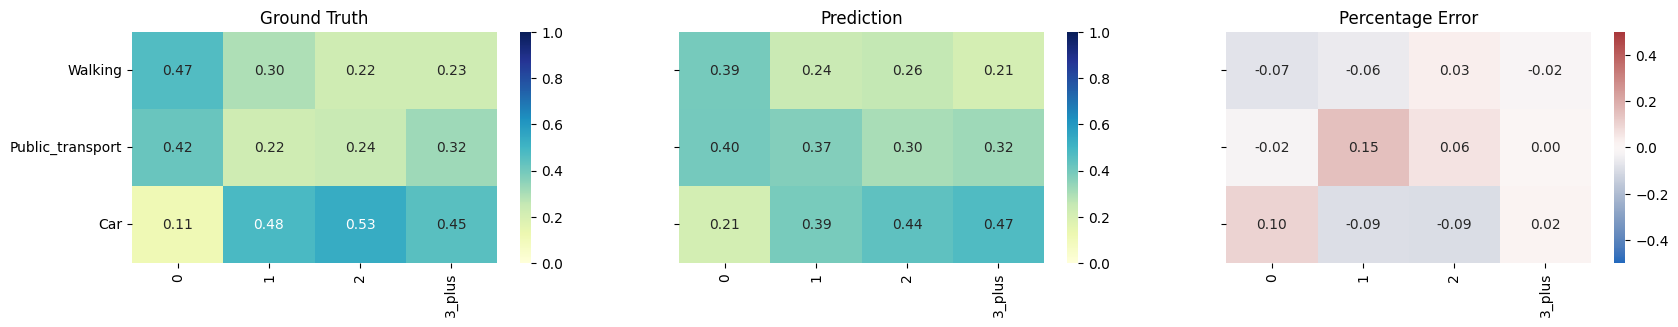

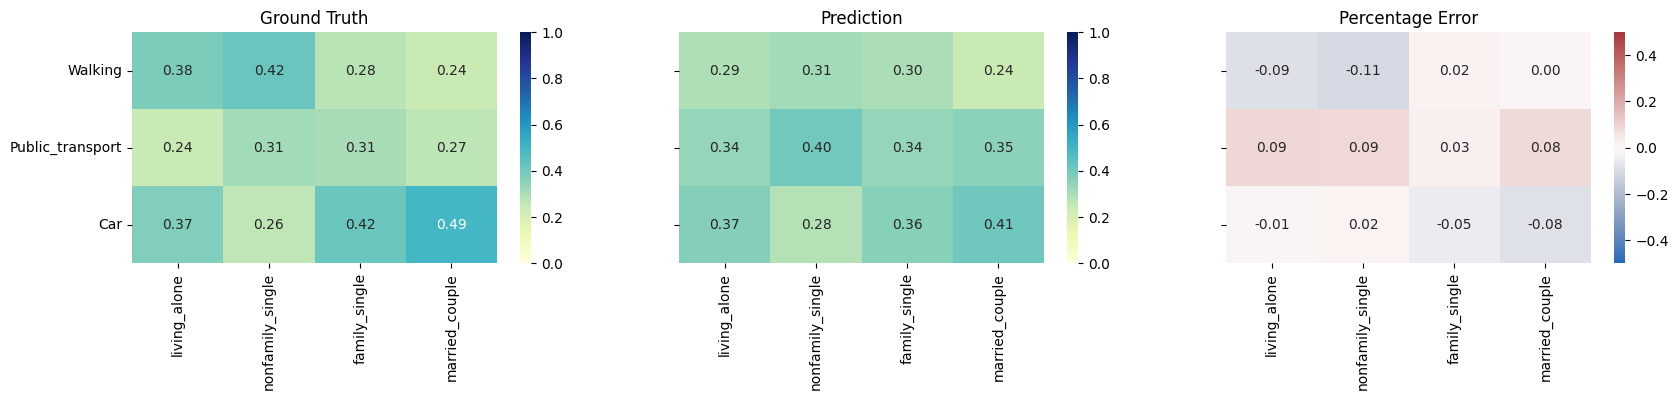

CCE LOSS: 1.3686741980356574
MAPE: 0.07326238000703185
KL Divergence: 0.36296476474502054


In [13]:
from model import ChoiceModel

model_name = 'proposed_method'
num_sample = 1000

choice_model = ChoiceModel(
    data_dir='data', desire=desire, choice_type=choice_type,
    sample_num=num_sample, skip_init=True, seed=seed)

loss, error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

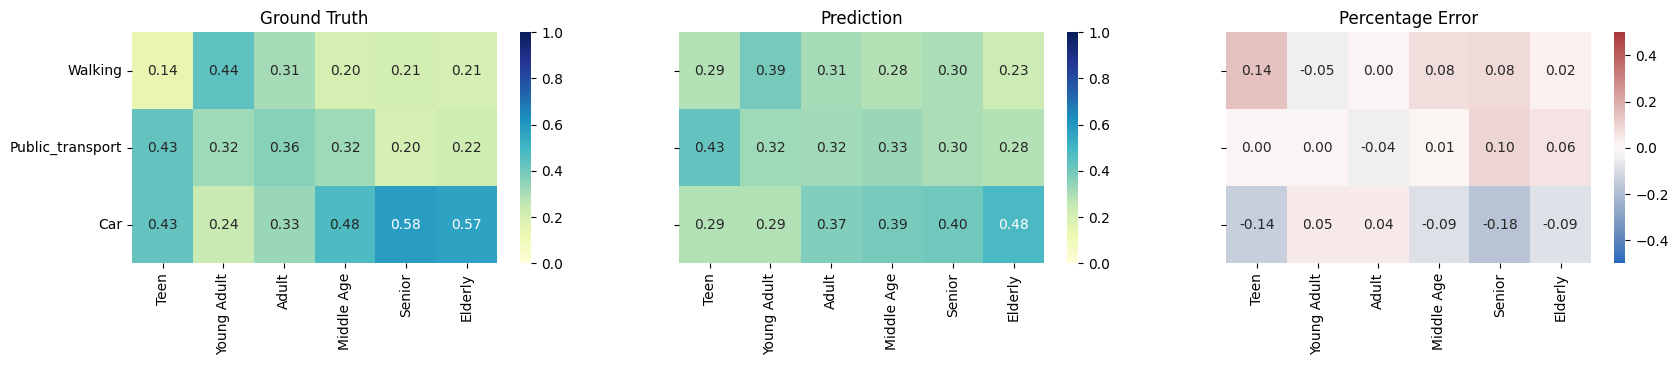

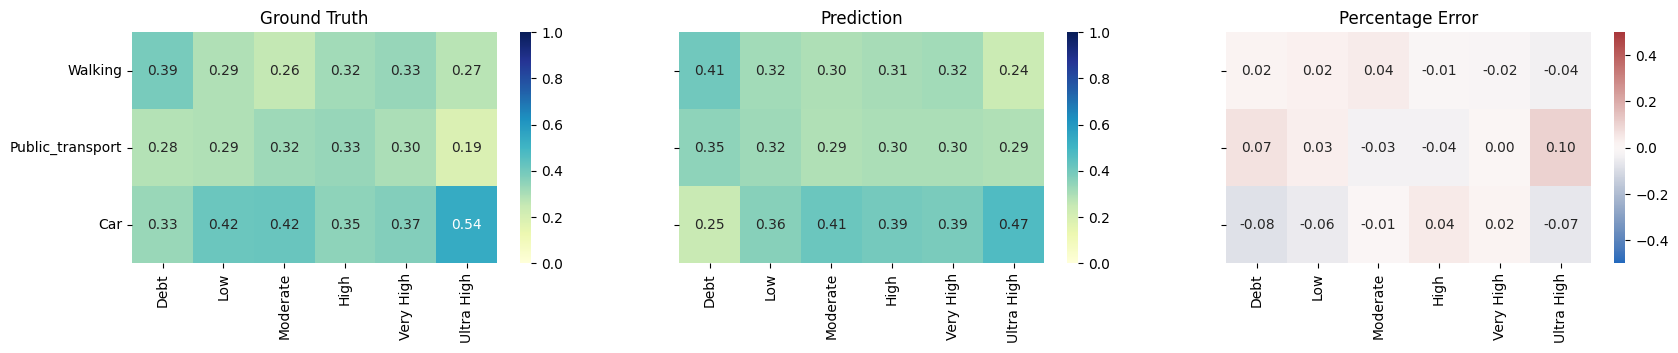

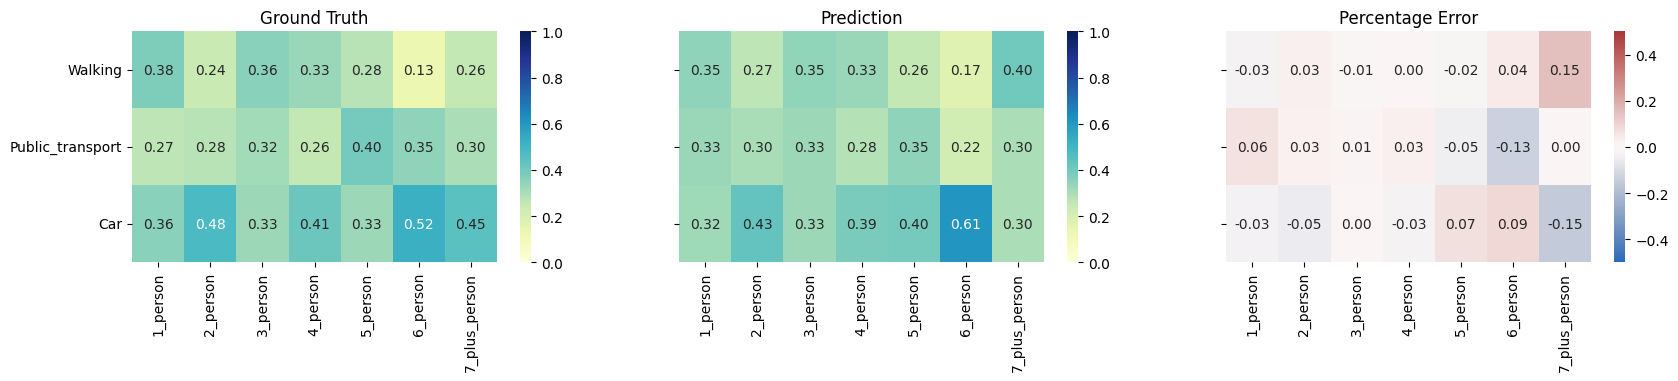

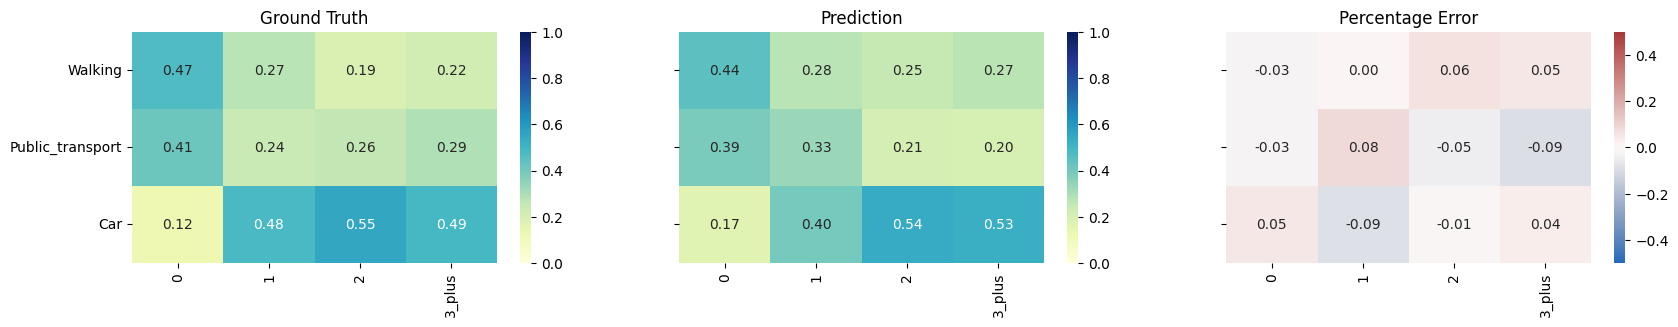

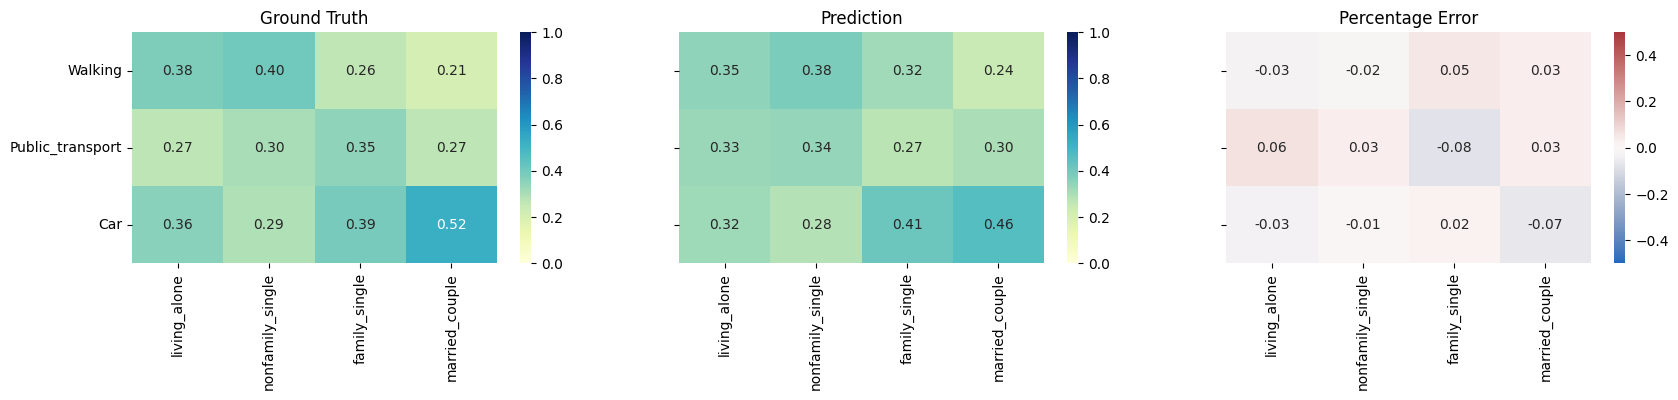

CCE LOSS: 1.0884173603051874
MAPE: 0.04797085309695294
KL Divergence: 0.017768929061586707


In [21]:
from model import ChoiceModel

model_name = 'proposed_method'
num_sample = 10000

choice_model = ChoiceModel(
    data_dir='data', desire=desire, choice_type=choice_type,
    sample_num=num_sample, skip_init=True, seed=seed)

loss, error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=True)

print('CCE LOSS:', loss)
print('MAPE:', error['mean'])
print('KL Divergence:', kl_divergence['mean'])

# Results


In [14]:
expeiment_data = pd.concat(
    [rf_df, xgb_df, mlp_df, proposed_df], ignore_index=True)
expeiment_data.head()
experiment_path = 'data/experiments/experiments_mode(<1000).csv'
expeiment_data.to_csv(experiment_path, index=False)

In [15]:
# experiment_path = 'data/experiments/experiments_01.csv'
# expeiment_data = pd.read_csv(experiment_path)

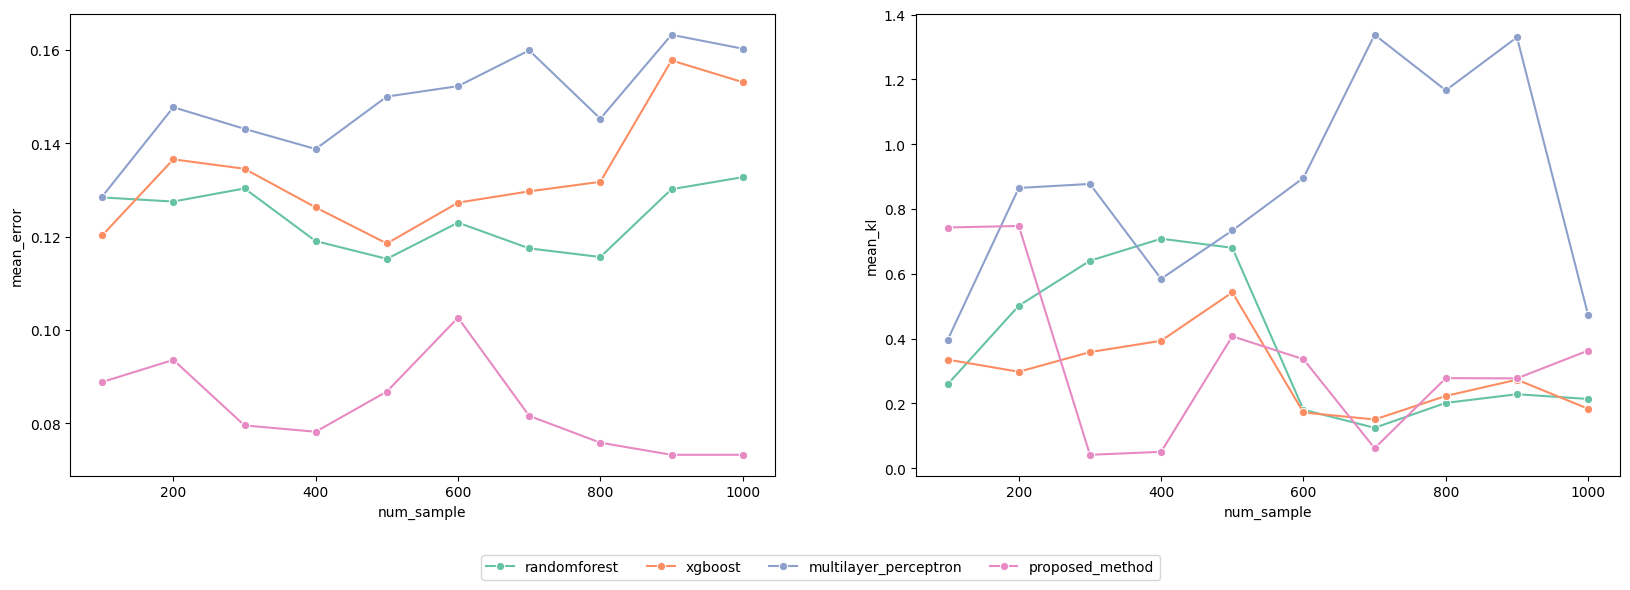

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

plot_data = expeiment_data

color_palette = "Set2"

# line1 = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
#                      y='loss', ax=axs[0], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])

line1 = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
                     y='mean_error', ax=axs[0], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])

line2 = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
                     y='mean_kl', ax=axs[1], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])


handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
for ax in axs:
    # ax.set_xticks(range(0, 22000, 4000))
    ax.legend().remove()

# Add a single legend
fig.legend(handles, labels, loc='upper center',
           ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.show()

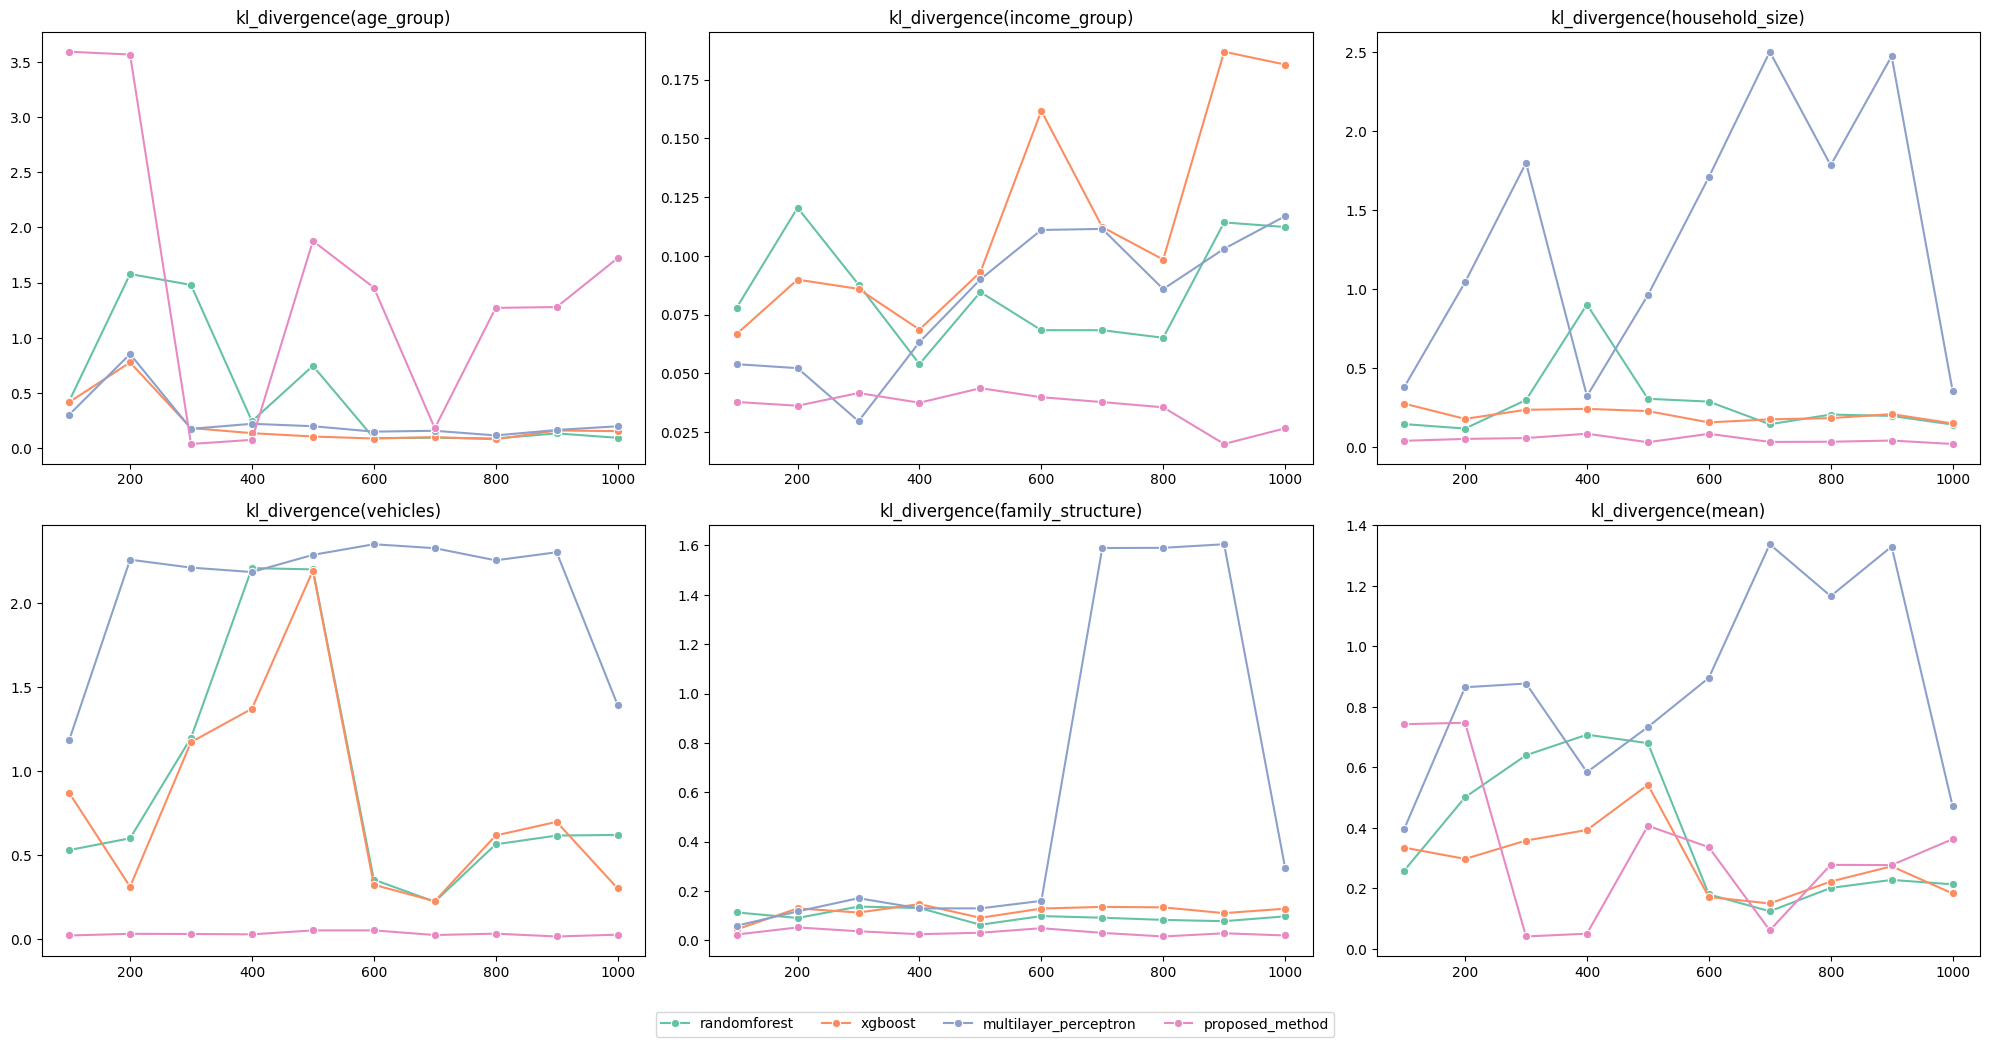

In [17]:
plot_data = expeiment_data

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs = axs.flatten()

for idx, key in enumerate(['age_group', 'income_group', 'household_size', 'vehicles', 'family_structure', 'mean']):
    col_name = key + '_kl'
    line = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
                        y=col_name, ax=axs[idx], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])
    axs[idx].set_title(f'kl_divergence({key})')
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    # axs[idx].set_xticks(range(0, 22000, 4000))
    axs[idx].legend().remove()


handles, labels = line.get_legend_handles_labels()

# Add a single legend
fig.legend(handles, labels, loc='upper center',
           ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.tight_layout()
plt.show()

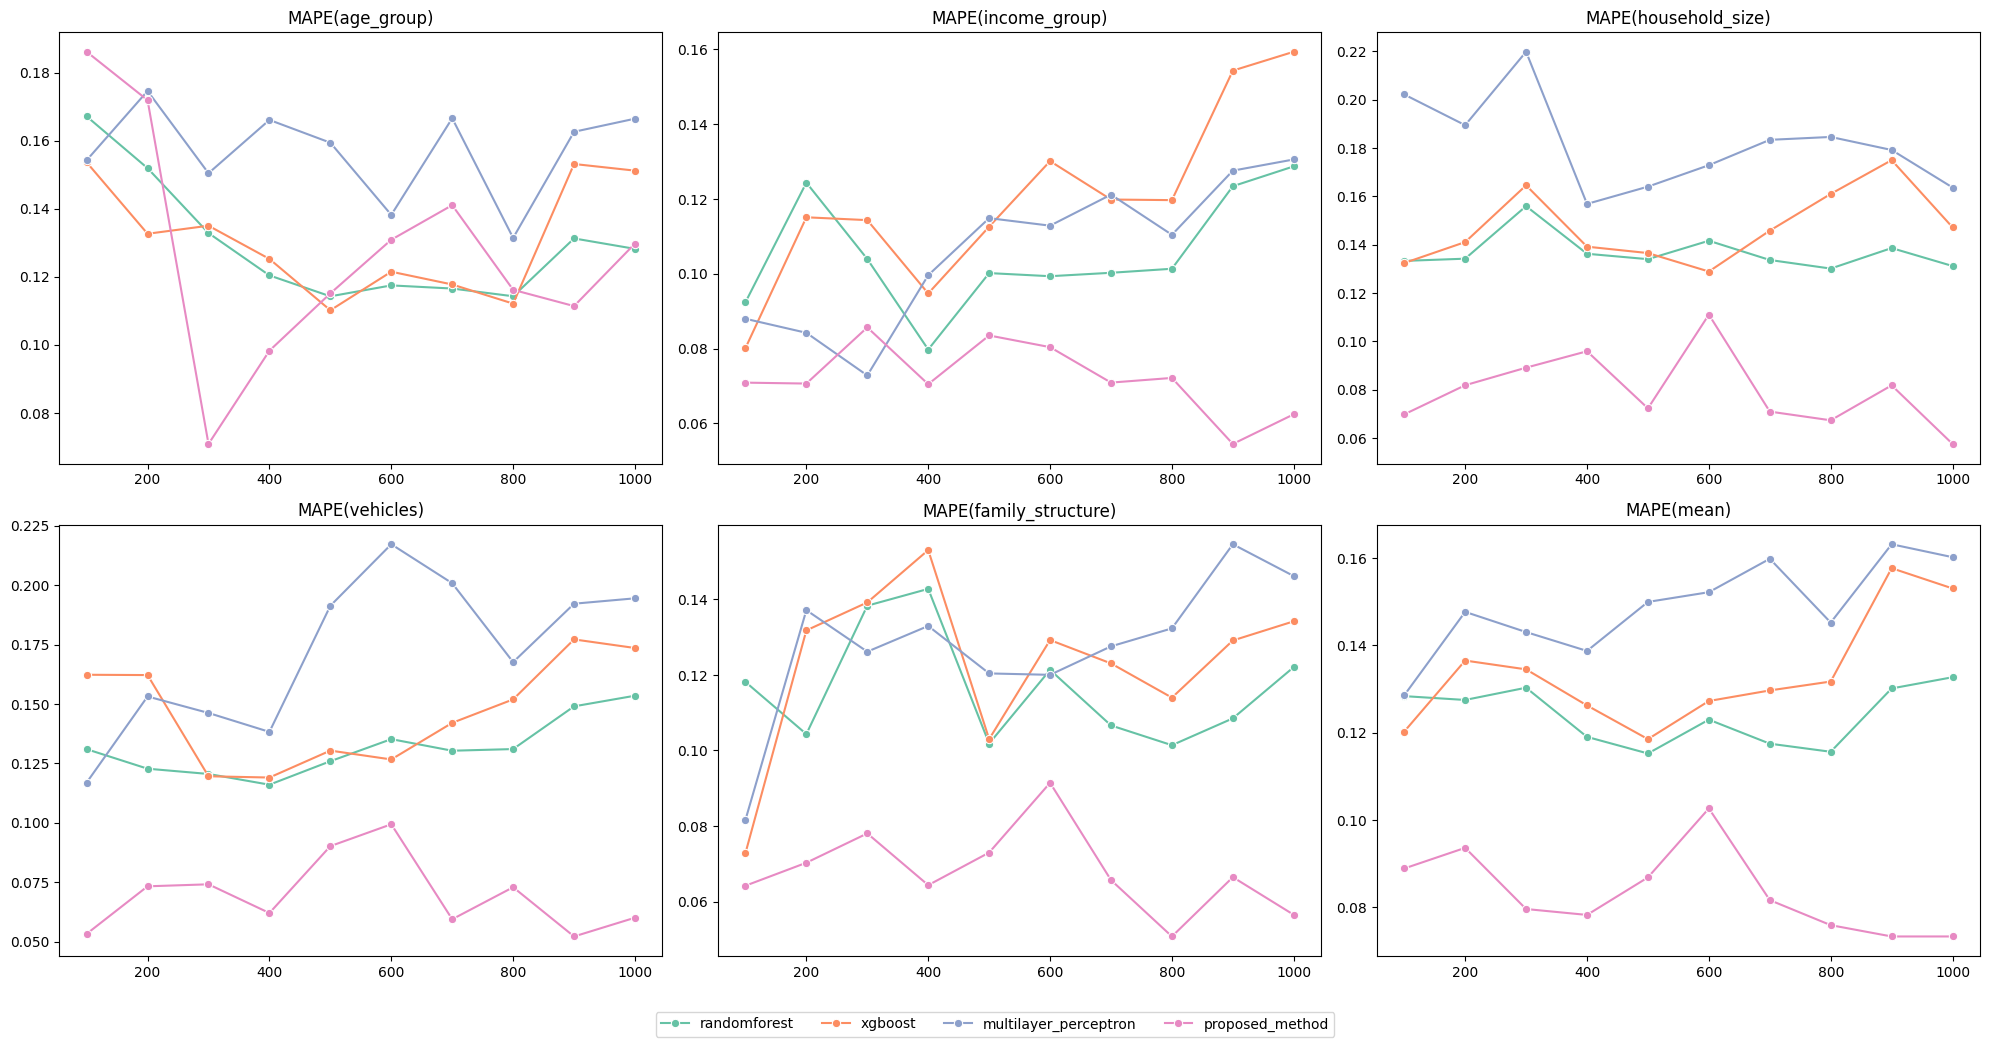

In [18]:
plot_data = expeiment_data

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs = axs.flatten()

for idx, key in enumerate(['age_group', 'income_group', 'household_size', 'vehicles', 'family_structure', 'mean']):
    col_name = key + '_error'
    line = sns.lineplot(data=plot_data, x='num_sample', hue='model_name', marker='o',
                        y=col_name, ax=axs[idx], palette=sns.color_palette(color_palette)[:len(plot_data['model_name'].unique())])
    axs[idx].set_title(f'MAPE({key})')
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    # axs[idx].set_xticks(range(0, 22000, 4000))
    axs[idx].legend().remove()


handles, labels = line.get_legend_handles_labels()

# Add a single legend
fig.legend(handles, labels, loc='upper center',
           ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.tight_layout()
plt.show()